In [1]:
import numpy as np

In [2]:
np.random.seed(2343243)

In [3]:
mean_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 20)

In [4]:
mean_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2 = np.random.multivariate_normal(mean_vec2, cov_mat2, 20)

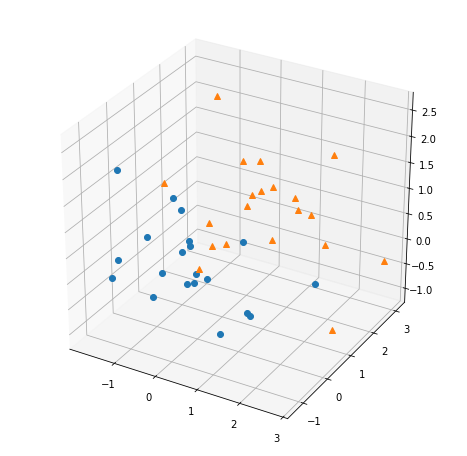

In [5]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(class1[:, 0], class1[:, 1], class1[:, 2], 'o')
ax.plot(class2[:, 0], class2[:, 1], class2[:, 2], '^')
plt.show()

In [6]:
all_data = np.concatenate((class1, class2))
all_data.shape

(40, 3)

In [7]:
all_data.mean(axis = 0)

array([ 0.4560612 ,  0.47118588,  0.64109922])

In [8]:
all_data = all_data.T

In [9]:
cov_mat = np.cov(all_data)
cov_mat

array([[ 1.48156581,  0.43272336,  0.00832651],
       [ 0.43272336,  1.06868385,  0.09154185],
       [ 0.00832651,  0.09154185,  0.77659054]])

In [12]:
eig_val, eig_vec = np.linalg.eig(cov_mat)
eig_val, eig_vec, eig_vec[:,0]

(array([ 1.75777104,  0.8582392 ,  0.71082995]),
 array([[-0.84204244, -0.43906668,  0.31334482],
        [-0.5363712 ,  0.61995098, -0.57268378],
        [-0.05718794,  0.65029319,  0.75752776]]),
 array([-0.84204244, -0.5363712 , -0.05718794]))

In [22]:
eig_val_vec_pairs = []
for i in range(len(eig_val)):
    eig_vector = eig_vec[:,i]
    eig_val_vec_pairs.append((eig_val[i], eig_vector))
eig_val_vec_pairs.sort(reverse = True)
matrix_eig = np.array([eig_val_vec_pairs[0][1],eig_val_vec_pairs[1][1]]) 
matrix_eig

array([[-0.84204244, -0.5363712 , -0.05718794],
       [-0.43906668,  0.61995098,  0.65029319]])

In [29]:
transformed = matrix_eig.dot(all_data)
transformed = transformed.T
transformed.shape

(40, 2)

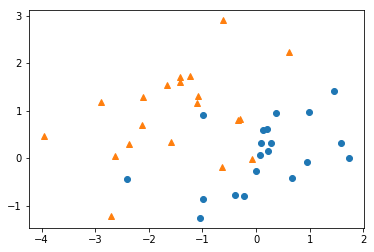

In [32]:
plt.plot(transformed[0:20, 0], transformed[0:20, 1], 'o')
plt.plot(transformed[20:40, 0], transformed[20:40, 1], '^')

plt.show()

In [33]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components =2)
skl_transformed = pca.fit_transform(all_data.T)

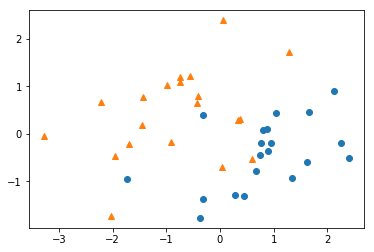

In [43]:
skl_transformed[:, 0] *= -1
plt.plot(skl_transformed[0:20, 0], skl_transformed[0:20, 1], 'o')
plt.plot(skl_transformed[20:40, 0], skl_transformed[20:40, 1], '^')

plt.show()